# Predicting OBDII P0128

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Load and review data

In [2]:
df = pd.read_csv("./data/P0128_raw_data.csv")

In [3]:
df.shape

(3081, 11)

In [4]:
df.head(8)

,GPSUpdateUTC,DeltaDistance,Direction,Distance,EventCode,Odometer,speed,TotalIdleTime,TripDuration,addr_id,DTC
0,2017-11-13 13:17:37.000,0.0,36,0.0,122,45800.771,0,0,0,20171113131737000,0
1,2017-11-13 13:17:37.000,0.0,36,0.0,143,45800.771,0,2,0,20171113131737000,0
2,2017-11-13 13:17:39.000,0.0,36,0.0,145,45800.771,0,2,2,20171113131739000,0
3,2017-11-13 13:18:09.000,0.0,36,0.0,10,45800.771,0,0,32,20171113131809000,0
4,2017-11-13 13:19:36.000,0.0,36,0.0,143,45800.771,0,9,119,20171113131936000,0
5,2017-11-13 13:19:37.000,0.0,36,0.0,1,45800.771,0,1,120,20171113131937000,0
6,2017-11-13 13:19:45.000,0.0,36,0.0,123,45800.771,0,11,128,20171113131945000,0
7,2017-11-13 13:19:45.000,0.0,36,0.0,145,45800.771,0,9,128,20171113131945000,0


### Drop datetime column

In [17]:
df.drop(columns=['GPSUpdateUTC'])

,DeltaDistance,Direction,Distance,EventCode,Odometer,speed,TotalIdleTime,TripDuration,addr_id,DTC
0,0.000,36,0.000,122,45800.771,0,0,0,20171113131737000,0
1,0.000,36,0.000,143,45800.771,0,2,0,20171113131737000,0
2,0.000,36,0.000,145,45800.771,0,2,2,20171113131739000,0
3,0.000,36,0.000,10,45800.771,0,0,32,20171113131809000,0
4,0.000,36,0.000,143,45800.771,0,9,119,20171113131936000,0
5,0.000,36,0.000,1,45800.771,0,1,120,20171113131937000,0
6,0.000,36,0.000,123,45800.771,0,11,128,20171113131945000,0
7,0.000,36,0.000,145,45800.771,0,9,128,20171113131945000,0
8,0.000,36,0.000,10,45800.771,0,0,0,20171113145009000,0
9,0.000,36,0.000,122,45800.771,0,0,0,20171113145009000,0


### Check for NULL values

In [18]:
df.isnull().values.any()

False

### Check for features coorelation

In [19]:
def plot_corr(df, size=8):
    """
    Blue-cyan-yellow-red-darkred ==> less to more correlated
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

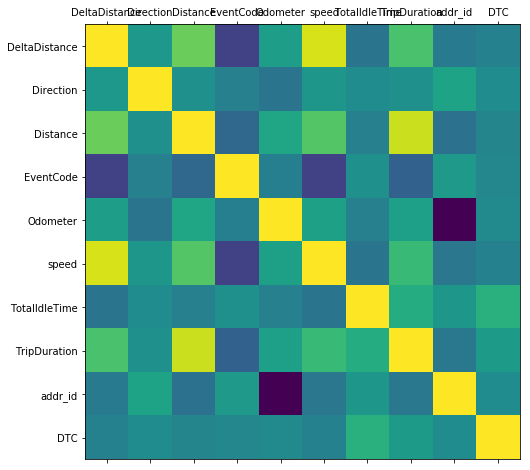

In [20]:
plot_corr(df)

In [21]:
df.corr()

,DeltaDistance,Direction,Distance,EventCode,Odometer,speed,TotalIdleTime,TripDuration,addr_id,DTC
DeltaDistance,1.000000,0.094333,0.557302,-0.565687,0.138308,0.878730,-0.196460,0.444393,-0.142546,-0.090420
Direction,0.094333,1.000000,0.030305,-0.094001,-0.194522,0.084093,-0.000320,0.036255,0.184777,0.003288
Distance,0.557302,0.030305,1.000000,-0.290865,0.206762,0.481255,-0.097285,0.843226,-0.210252,-0.059102
EventCode,-0.565687,-0.094001,-0.290865,1.000000,-0.104854,-0.557949,0.031299,-0.336754,0.102172,-0.039385
Odometer,0.138308,-0.194522,0.206762,-0.104854,1.000000,0.164439,-0.097544,0.157038,-0.941560,-0.011746
speed,0.878730,0.084093,0.481255,-0.557949,0.164439,1.000000,-0.197504,0.377935,-0.168354,-0.092079
TotalIdleTime,-0.196460,-0.000320,-0.097285,0.031299,-0.097544,-0.197504,1.000000,0.262812,0.082851,0.288919
TripDuration,0.444393,0.036255,0.843226,-0.336754,0.157038,0.377935,0.262812,1.000000,-0.167730,0.119651
addr_id,-0.142546,0.184777,-0.210252,0.102172,-0.941560,-0.168354,0.082851,-0.167730,1.000000,0.005618
DTC,-0.090420,0.003288,-0.059102,-0.039385,-0.011746,-0.092079,0.288919,0.119651,0.005618,1.000000


### Check true/false ratio

In [22]:
num_true = len(df.loc[df['DTC'] == 1])
num_false = len(df.loc[df['DTC'] == 0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false / (num_true + num_false)) * 100))

Number of True cases: 323 (10.48%)
Number of False cases: 2758 (89.52%)


## Split the data

In [23]:
from sklearn.model_selection import train_test_split

feature_col_names = ['DeltaDistance','Direction','Distance','EventCode','Odometer','speed','TotalIdleTime','TripDuration','addr_id']
predicted_class_names = ['DTC']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)
# test_size = 0.3 is 30%, 42 is the answear to everything

we check to ensure we have the desired 70% train, 30% test split of the data

In [24]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.98% in training set
30.02% in test set


### Verifying predicted value was splited correctly

In [25]:
print("Original True: {0} ({1:0.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print("Original False: {0} ({1:0.2f}%)".format(num_false, (num_false / (num_true + num_false)) * 100))
print("")
print("Training True: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100)))
print("Training False: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100)))
print("")
print("Test True: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100)))
print("Test False: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100)))

Original True: 323 (10.48%)
Original False: 2758 (89.52%)

Training True: 215 (9.97%)
Training False: 1941 (90.03%)

Test True: 108 (11.68%)
Test False: 817 (88.32%)


## Training initial algorithm - Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training data

In [27]:
# Predict values using the training data
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.9003


### Performance on Testing data

In [28]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.8832


### Metrics

In [29]:
print("Confusion Metrics")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Metrics
[[817   0]
 [108   0]]

Classification Report
             precision    recall  f1-score   support

          0       0.88      1.00      0.94       817
          1       0.00      0.00      0.00       108

avg / total       0.78      0.88      0.83       925



C:\Users\fangyijie.wang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Training algorithm - Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [38]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9912


### Performance on Testing data

In [39]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.9449


In [40]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print("")
print("Classifier Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[802  15]
 [ 36  72]]

Classifier Report
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       817
          1       0.83      0.67      0.74       108

avg / total       0.94      0.94      0.94       925



## Random Forest K-fold cross validation

In [36]:
# original accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Accuracy: {0:.4f}".format(metrics.recall_score(y_train, rf_predict_train)))

Accuracy: 0.9912
Accuracy: 0.9302


### Grid Search with Cross Validation

In [41]:
# Look at parameters used by our current forest
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [42]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf_base = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_base, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [43]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train.ravel())
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.6min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

### Optimised algorithm using new parameters

In [57]:
from sklearn.model_selection import cross_val_score

cv_scores = []

rf_model_p = RandomForestClassifier(bootstrap = True, max_depth = 80, max_features = 3, min_samples_leaf = 3, min_samples_split = 8, n_estimators = 300)

# fit the model with training set
scores = cross_val_score(rf_model_p, X_train, y_train.ravel(), cv = kfold, scoring='accuracy')
cv_scores.append(scores.mean()*100)

print("Train accuracy %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std()*100))

Train accuracy 94.99 (+/- 2.06)


In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

cv_preds = []
kfold = KFold(n_splits = 10, random_state = 123)

# predict on testing set
preds = cross_val_predict(rf_model_p, X_test, y_test.ravel(), cv = kfold)
cv_preds.append(metrics.accuracy_score(y_test, preds)*100)
print("Test accuracy %0.2f" % (100*metrics.accuracy_score(y_test, preds)))

Test accuracy 93.30
